# Digital System Project
## Using AI to detect Parkinson's disease
### Source code
#### Author: Abdurafay Choudhry
#### ID: 20048494

#### Loading required libraries and defining paths 
This code loops over all the audio files in the "HC_chunks" and "PD_chunks" directories, loads each audio file using the Pydub library, sets the sample width to 16-bit, and overwrites the original file with the new audio file. This is done to ensure that all audio files are in the same format before they are processed further.






In [2]:

import tensorflow as tf
import os
import soundfile as sf
from pydub import AudioSegment
import librosa
import matplotlib.pyplot as plt
        
# loop over all files in the HC_chunks directory
for file in os.listdir(os.path.join('data', 'HC_chunks')):
    if file.endswith('.wav'):
        # create a file path
        file_path = os.path.join('data', 'HC_chunks', file)
        # load the audio file using pydub
        audio = AudioSegment.from_wav(file_path)
        # set the sample width to 16-bit
        audio = audio.set_sample_width(2)
        # overwrite the original file with the new audio file
        audio.export(file_path, format='wav')

# loop over all files in the PD_chunks directory
for file in os.listdir(os.path.join('data', 'PD_chunks')):
    if file.endswith('.wav'):
        # create a file path
        file_path = os.path.join('data', 'PD_chunks', file)
        # load the audio file using pydub
        audio = AudioSegment.from_wav(file_path)
        # set the sample width to 16-bit
        audio = audio.set_sample_width(2)
        # overwrite the original file with the new audio file
        audio.export(file_path, format='wav')

     


In [3]:
import IPython.display as ipd

# Specify the file path
file_path = "data\\PD_chunks\\ID32_pd_3_1_1-Copy1.wav"

# Play the audio file
ipd.Audio(file_path)

#### Building a loading function
We will now define a function named "load_wav" that loads and decodes a WAV audio file using TensorFlow. The function takes a file path as input and outputs the waveform and sample rate of the audio. It will also prints out some information about the loaded audio file.

In [4]:

def load_wav(file_path):
    # Read the contents of the WAV file
    file_contents = tf.io.read_file(file_path)
    
    # Decode the WAV file and extract the waveform and sample rate
    print("Decoding WAV file...")
    wav, samplerate = tf.audio.decode_wav(file_contents, desired_channels=1)
    
    # Squeeze out the channel dimension if present and cast the sample rate to int64
    wav = tf.squeeze(wav, axis=-1)
    samplerate = tf.cast(samplerate, dtype=tf.int64)
    
    # Print information about the loaded audio
    print(f"Audio shape: {wav.shape}")
    print(f"Sample rate: {samplerate} Hz")
    print(f"Loaded file: {file_path}")
    
    # Return the mono waveform
    return wav


In [5]:
wav = load_wav(file_path)

#display the loaded audio waveform
wav

Decoding WAV file...
Audio shape: (3221021,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\ID32_pd_3_1_1-Copy1.wav


<tf.Tensor: shape=(3221021,), dtype=float32, numpy=
array([-9.1552734e-05,  9.1552734e-05, -6.1035156e-05, ...,
       -1.4648438e-03, -7.0190430e-04, -1.3427734e-03], dtype=float32)>

#### Creating a TensorFlow Dataset 
TensorFlow datasets are created for positive and negative audio files with their labels, then concatenates them into one dataset where we will be later used as input to a mapping function.

In [6]:
# Set the paths to the positive and negative audio chunk directories
PD = os.path.join('data','PD_chunks')
HC = os.path.join('data','HC_chunks')

# Load the audio file paths into TensorFlow datasets
pd = tf.data.Dataset.list_files(PD+'\*.wav')
hc = tf.data.Dataset.list_files(HC+'\*.wav')

# Create TensorFlow datasets containing tuples of the audio file paths and their corresponding labels (1 for pd_positive, 0 for pd_negative)
pd_positive = tf.data.Dataset.zip((pd, tf.data.Dataset.from_tensor_slices(tf.ones(len(pd)))))
pd_negative = tf.data.Dataset.zip((hc, tf.data.Dataset.from_tensor_slices(tf.zeros(len(hc)))))

# Concatenate the positive and negative datasets into one
data = pd_positive.concatenate(pd_negative)

# Print the length of the combined dataset
print('Combined dataset size:', len(data))
print('positive dataset size:', len(pd))
print('negative dataset size:', len(hc))  
pd_positive

Combined dataset size: 944
positive dataset size: 415
negative dataset size: 529


<ZipDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

This line shuffles the data in the TensorFlow dataset object "data" using a buffer of size 10000 and returns an iterator. The ".next()" method then returns the first element of the shuffled data as a numpy array.

In [7]:
data.shuffle(buffer_size=10000).as_numpy_iterator().next()


(b'data\\HC_chunks\\chunk0 (16).wav', 0.0)

This code loads each WAV file in the "PD_chunks" directory as a tensor, and appends the length of the tensor to a list called "lengths". It uses a function called "load_wav" to load the WAV files as tensors.

In [8]:
# Create an empty list to hold the lengths of all audio files in PD_chunks directory
lengths = []

# Loop through each file in PD_chunks directory and load the WAV file as a tensor
for file in os.listdir(os.path.join('data', 'PD_chunks')):
    # Check if the file is a WAV file
    if file.endswith('.wav'):
        # Load the WAV file as a tensor and append its length to the lengths list
        tensor_wave = load_wav(os.path.join('data', 'PD_chunks', file))
        lengths.append(len(tensor_wave))

# Print the lengths of all audio files in PD_chunks directory
lengths


Decoding WAV file...
Audio shape: (5658935,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\55.wav
Decoding WAV file...
Audio shape: (5641310,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\56.wav
Decoding WAV file...
Audio shape: (5641310,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\57.wav
Decoding WAV file...
Audio shape: (5401468,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\59.wav
Decoding WAV file...
Audio shape: (5401468,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\60.wav
Decoding WAV file...
Audio shape: (5220096,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\61.wav
Decoding WAV file...
Audio shape: (5220096,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\62.wav
Decoding WAV file...
Audio shape: (4863641,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\63.wav
Decoding WAV file...
Audio shape: (4825073,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\64.wav
Decoding WAV file...
Audio shape: (4825073,)
Sample rate: 44100 Hz
Loaded file: da

Audio shape: (15303,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk13 (12).wav
Decoding WAV file...
Audio shape: (59358,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk13 (2).wav
Decoding WAV file...
Audio shape: (28709,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk13 (3).wav
Decoding WAV file...
Audio shape: (10055,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk13 (4).wav
Decoding WAV file...
Audio shape: (75499,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk13 (5)-Copy1.wav
Decoding WAV file...
Audio shape: (75499,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk13 (5).wav
Decoding WAV file...
Audio shape: (71442,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk13 (6).wav
Decoding WAV file...
Audio shape: (70251,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk13 (7).wav
Decoding WAV file...
Audio shape: (133358,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk13 (8).wav
Decoding WAV file...
Audio shape

Audio shape: (63989,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk19 (2).wav
Decoding WAV file...
Audio shape: (58962,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk19 (3).wav
Decoding WAV file...
Audio shape: (84187,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk19 (4).wav
Decoding WAV file...
Audio shape: (56183,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk19 (5)-Copy1.wav
Decoding WAV file...
Audio shape: (56183,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk19 (5).wav
Decoding WAV file...
Audio shape: (94242,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk19 (6).wav
Decoding WAV file...
Audio shape: (33208,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk19 (7).wav
Decoding WAV file...
Audio shape: (15170,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk19 (8).wav
Decoding WAV file...
Audio shape: (115057,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk19 (9).wav
Decoding WAV file...
Audio shape:

Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk25 (4).wav
Decoding WAV file...
Audio shape: (11201,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk25 (5)-Copy1.wav
Decoding WAV file...
Audio shape: (11201,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk25 (5).wav
Decoding WAV file...
Audio shape: (109147,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk25 (6).wav
Decoding WAV file...
Audio shape: (133976,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk25 (7).wav
Decoding WAV file...
Audio shape: (47540,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk25.wav
Decoding WAV file...
Audio shape: (17420,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk26 (2).wav
Decoding WAV file...
Audio shape: (175695,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk26 (3).wav
Decoding WAV file...
Audio shape: (90096,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk26 (4).wav
Decoding WAV file...
Audio shape: (11775,)
Sample rate: 4

Audio shape: (7376335,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk43.wav
Decoding WAV file...
Audio shape: (6948249,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk44.wav
Decoding WAV file...
Audio shape: (6905905,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk45.wav
Decoding WAV file...
Audio shape: (6847482,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk46.wav
Decoding WAV file...
Audio shape: (6512057,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk47.wav
Decoding WAV file...
Audio shape: (6259465,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk48.wav
Decoding WAV file...
Audio shape: (6221671,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk49.wav
Decoding WAV file...
Audio shape: (61872,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk5 (10)-Copy1.wav
Decoding WAV file...
Audio shape: (61872,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk5 (10).wav
Decoding WAV file...
Audio shape: (160392,)
Samp

Audio shape: (173578,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk9 (9).wav
Decoding WAV file...
Audio shape: (173578,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\chunk9.wav
Decoding WAV file...
Audio shape: (3694600,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\ID27_pd_4_1_1-Copy1.wav
Decoding WAV file...
Audio shape: (3694600,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\ID27_pd_4_1_1.wav
Decoding WAV file...
Audio shape: (3221021,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\ID32_pd_3_1_1-Copy1.wav
Decoding WAV file...
Audio shape: (3221021,)
Sample rate: 44100 Hz
Loaded file: data\PD_chunks\ID32_pd_3_1_1.wav


[5658935,
 5641310,
 5641310,
 5401468,
 5401468,
 5220096,
 5220096,
 4863641,
 4825073,
 4825073,
 4117237,
 4117237,
 3781233,
 3781233,
 11378,
 11378,
 33472,
 25534,
 17772,
 16802,
 9834,
 28136,
 15435,
 43527,
 26019,
 26945,
 25049,
 49921,
 67605,
 16934,
 149322,
 50980,
 50980,
 168903,
 68575,
 20153,
 466622,
 10408,
 73823,
 94727,
 28357,
 56140,
 2478729,
 56536,
 9570,
 21873,
 22403,
 9791,
 9791,
 169962,
 29547,
 25225,
 97770,
 159157,
 28665,
 68003,
 68003,
 73824,
 58212,
 52831,
 336483,
 62313,
 22976,
 22976,
 82026,
 60858,
 32678,
 109456,
 16097,
 153468,
 153468,
 148265,
 413702,
 43968,
 22535,
 84143,
 419700,
 419700,
 62622,
 138518,
 73383,
 30694,
 10011,
 82026,
 82026,
 38455,
 199332,
 55258,
 78057,
 24431,
 277521,
 277521,
 58256,
 15303,
 59358,
 28709,
 10055,
 75499,
 75499,
 71442,
 70251,
 133358,
 100680,
 144825,
 180149,
 180149,
 100548,
 26592,
 71309,
 214414,
 10540,
 91023,
 91023,
 74000,
 174151,
 27166,
 64915,
 36383,
 2033

In [9]:
#To find the maximum value in a list of numbers
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=9228871>

In [10]:
#This returns the minimum value in the lengths list 
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=8864>

### Building a preprocessing function 
#### Mel-frequency cepstral coefficients (MFCCs)

The function "preprocess_audio" that takes a file path and a label as inputs, and performs several preprocessing steps on the audio file. It first loads the WAV file as a mono waveform, pads it with zeros if its length is less than 80000 samples or clips it to 5 seconds if its length is greater than 5 seconds, extracts MFCC features from the waveform using librosa library, and pads the MFCCs to the maximum length. The final output is a tensor containing the padded MFCCs. This function will later be used in mapping the data dataset.

In [11]:
def extract_mfcc(wav):
    return librosa.feature.mfcc(y=wav, sr=44100, n_mfcc=13)

In [12]:
@tf.function
def preprocess_audio(file_path, label): 
    # Load audio file
    samplerate = 44100
    wav = load_wav(file_path)

    # Trim audio to the first 80,000 samples and zero-pad if necessary
    wav = wav[:80000]
    zero_padding = tf.zeros([80000 - tf.shape(wav)[0]], dtype=tf.float32)
    wav = tf.concat([zero_padding, wav], 0)

    # If audio length is more than 5 seconds, truncate it to 5 seconds
    if len(wav) > samplerate * 5:
        wav = wav[:samplerate*5]

    # Convert waveform to tensor object
    wav = tf.convert_to_tensor(wav)

    # Extract MFCC features using Librosa
    mfccs = tf.numpy_function(func=extract_mfcc, inp=[wav], Tout=tf.float32)

    # Take absolute value of MFCCs
    mfccs = abs(mfccs)

    # Add a channel dimension to MFCCs tensor
    mfccs = tf.expand_dims(mfccs, axis=-1)

    # Return MFCCs and label as tensor objects
    return mfccs, label


Padding is essential here to ensure that all audio clips have the same length. This is necessary for building a Convolutional Neural Network (CNN) because the input tensors must have the same shape. Padding allows us to add zeros to the shorter audio clips to match the length of the longest clip, without altering their content.This will make each audio clip has the same dimensions and can be processed by the CNN in a better way.

In [13]:
filepath, label = data.shuffle(buffer_size=10000).as_numpy_iterator().next()
mfccs, label = preprocess_audio(filepath, label)
label


Decoding WAV file...
Audio shape: (None,)
Sample rate: Tensor("Cast:0", shape=(), dtype=int64) Hz
Loaded file: b'data\\PD_chunks\\chunk33.wav'


<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

#### Plot MFCC Coefficients

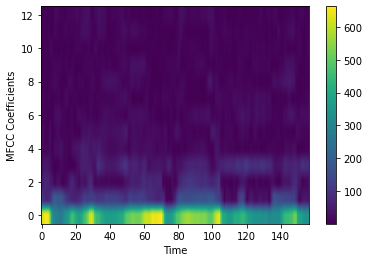

In [15]:
plt.imshow(mfccs[:,:,0], cmap='viridis', origin='lower', aspect='auto')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.colorbar()
plt.show()

### TensorFlow data pipeline

The .map function in TensorFlow allows for applying a function to each element of a dataset. In this case, "data = data.map(preprocess_audio)" applies the function "preprocess_audio" to each element (tuple) in the dataset "data". This function loads an audio file, preprocesses it by trimming, zero-padding, and extracting MFCC features, and returns the MFCC features and corresponding label as a tuple. Therefore, this line of code applies the preprocessing steps to each audio file in the dataset and returns the resulting MFCC features and labels as tuples.


In [14]:
data = data.map(preprocess_audio)
#Cache the data for faster processing
data = data.cache() 
data = data.shuffle(buffer_size=1000)
data = data.batch(32)
data = data.prefetch(16)

Decoding WAV file...
Audio shape: (None,)
Sample rate: Tensor("Cast:0", shape=(), dtype=int64) Hz
Loaded file: Tensor("file_path:0", shape=(), dtype=string)


#### Splitting training and testing

In [15]:
#Taking 70% training and the rest 30% for testing
train_size=int( len(data)*0.7)
print(F"Train size:{train_size}")

test_size= len(data) - train_size
print(F"Test size:{test_size}")

train= data.take(train_size)
print(train)

test = data.skip(train_size).take(test_size)
print(train)


Train size:21
Test size:9
<TakeDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>
<TakeDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>


In [16]:
#Extracting one batch of samples and labels from the train dataset
samples, labels = train.as_numpy_iterator().next()

#number of elements in the train and test dataset
train.cardinality().numpy()
test.cardinality().numpy()

9

### Creating a Sequential (Convolutional neural network) model
This model will be used for binary classification of audio data. It includes two convolutional layers with pooling, a flatten layer, and two dense layers with dropout. Then it wll compile the model with the Adam optimizer, binary crossentropy loss, and metrics including binary accuracy, precision, and recall.

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

def create_model():
    # Define the CNN model
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(13, 157, 1)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
       # tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    name='binary_accuracy'
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall()])
    
    return model

# Create the CNN model  
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 11, 155, 64)       640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 5, 77, 64)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 75, 128)        73856     
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3686528   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

Now we will train our model on the train dataset for 10 epochs and evaluate it on the test dataset after each epoch 

In [18]:
hist = model.fit(train, epochs=25, validation_data=test) 

Epoch 1/25
21/21 [==============================] - 3s 108ms/step - loss: 12.3898 - binary_accuracy: 0.5446 - precision: 0.4888 - recall: 0.4367 - val_loss: 0.6790 - val_binary_accuracy: 0.5662 - val_precision: 0.5075 - val_recall: 0.2857
Epoch 2/25
21/21 [==============================] - 2s 80ms/step - loss: 0.6902 - binary_accuracy: 0.5551 - precision: 0.4904 - recall: 0.1717 - val_loss: 0.6828 - val_binary_accuracy: 0.5441 - val_precision: 1.0000 - val_recall: 0.0236
Epoch 3/25
21/21 [==============================] - 2s 92ms/step - loss: 0.6627 - binary_accuracy: 0.5774 - precision: 0.7059 - recall: 0.0412 - val_loss: 0.6314 - val_binary_accuracy: 0.5882 - val_precision: 0.9091 - val_recall: 0.0826
Epoch 4/25
21/21 [==============================] - 2s 91ms/step - loss: 0.6467 - binary_accuracy: 0.5967 - precision: 0.6543 - recall: 0.1791 - val_loss: 0.6033 - val_binary_accuracy: 0.6912 - val_precision: 0.7500 - val_recall: 0.3750
Epoch 5/25
21/21 [==============================] 

In [19]:
#Contains values of metrics
hist.history

{'loss': [12.389768600463867,
  0.6901798844337463,
  0.6627407670021057,
  0.6466624736785889,
  0.6391373872756958,
  0.58751380443573,
  0.5806708335876465,
  0.53191739320755,
  0.4966255724430084,
  0.4403972625732422,
  0.41260701417922974,
  0.4252476096153259,
  0.32530227303504944,
  0.31570249795913696,
  0.26506999135017395,
  0.21326664090156555,
  0.17541857063770294,
  0.12812869250774384,
  0.10982736945152283,
  0.09060975164175034,
  0.0835408940911293,
  0.09058095514774323,
  0.0709407851099968,
  0.05429593846201897,
  0.052031341940164566],
 'binary_accuracy': [0.5446428656578064,
  0.555059552192688,
  0.5773809552192688,
  0.5967261791229248,
  0.6354166865348816,
  0.675595223903656,
  0.6934523582458496,
  0.7172619104385376,
  0.7485119104385376,
  0.7901785969734192,
  0.8095238208770752,
  0.8154761791229248,
  0.863095223903656,
  0.867559552192688,
  0.886904776096344,
  0.930059552192688,
  0.9345238208770752,
  0.9598214030265808,
  0.9672619104385376,
 

### KPI Plots

#### 1. Loss

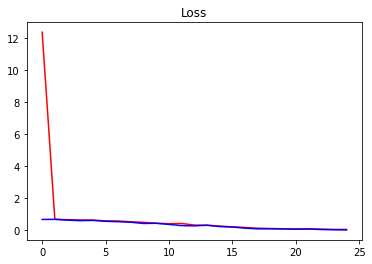

In [20]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

#### 2. Binary accuracy

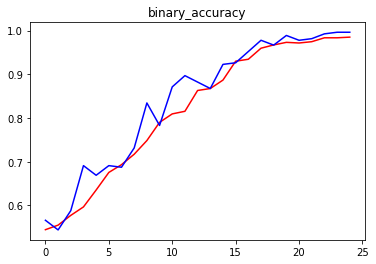

In [21]:
plt.title('binary_accuracy')
plt.plot(hist.history['binary_accuracy'], 'r')
plt.plot(hist.history['val_binary_accuracy'], 'b')
plt.show()

#### 3. Precision

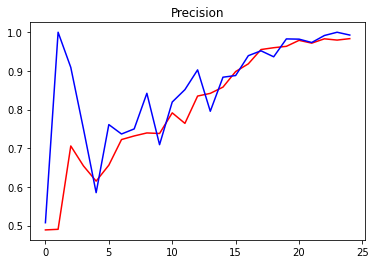

In [23]:
plt.title('Precision')
plt.plot(hist.history['precision'], 'r')
plt.plot(hist.history['val_precision'], 'b')
plt.show()

#### 4. Recall

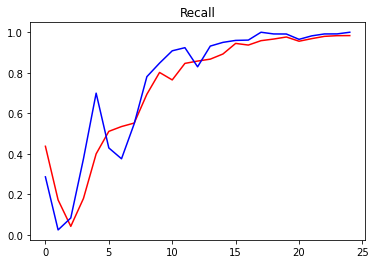

In [24]:
plt.title('Recall')
plt.plot(hist.history['recall'], 'r')
plt.plot(hist.history['val_recall'], 'b')
plt.show()

#### Predicting a single audio file

Now we will load a batch of data from the "X_test" set and feed it to the trained model to generate predictions for the corresponding labels. The predictions will be stored in the yhat variable

In [27]:
X_test, y_test = test.as_numpy_iterator().next() 
yhat = model.predict(X_test)
print(yhat)

[[6.9709599e-01]
 [9.9773455e-01]
 [7.9066157e-03]
 [9.9949527e-01]
 [9.9110925e-01]
 [1.8039116e-09]
 [4.5743585e-03]
 [9.9992740e-01]
 [9.9999833e-01]
 [9.9698728e-01]
 [9.9319792e-01]
 [9.6067595e-01]
 [8.1331432e-03]
 [1.0223985e-03]
 [3.3643235e-10]
 [9.9873126e-01]
 [9.8923594e-01]
 [9.9327111e-01]
 [4.1640103e-02]
 [9.9998331e-01]
 [9.8663157e-01]
 [3.2611274e-07]
 [3.1826645e-02]
 [9.9304438e-01]
 [9.9998367e-01]
 [9.8775667e-01]
 [9.7683418e-01]
 [1.0489282e-09]
 [1.2764186e-02]
 [2.8682351e-03]
 [9.3247694e-01]
 [1.3681982e-13]]


Creating a list yhat of binary predictions based on a given threshold of 0.5. For each prediction value in yhat, if it is greater than 0.5, then it is assigned a value of 1, otherwise it is assigned a value of 0.

In [28]:

# yhat=[]
# for prediction in yhat:
#     if prediction > 0.5:
#         yhat.append(1)
#     else:
#         yhat.append(0)
# yhat

yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]
print(yhat)

[1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]


In [29]:
#True set
y_test.astype(int)

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0])

In [30]:
tf.math.reduce_sum(yhat)
# Sum of predicted values

<tf.Tensor: shape=(), dtype=int32, numpy=19>

In [31]:
tf.math.reduce_sum(y_test)
# Sum of true values

<tf.Tensor: shape=(), dtype=float32, numpy=19.0>

#### For more simplification, PD detections are analysed in a selected audiofile, and has displayed.

In [32]:
# Calculate the number of positive and negative detections
num_positives = tf.math.reduce_sum(yhat).numpy()
num_negatives = len(yhat) - num_positives

# Create labels for the predictions
predicted_labels = ['PD' if pred == 1 else 'HC' for pred in yhat]

# Create labels for the true values
true_labels = ['PD' if val == 1 else 'HC' for val in y_test]

# Print the predicted labels and the number of positive/negative detections
print("Predicted labels:", predicted_labels)
print("Predicted no.of positive detections in this batch (PD):", num_positives)
print("Predicted no.of negative detections in this batch (HC):", num_negatives)

# Print the true labels and the number of positive/negative detections
print("True labels:", true_labels)
print("True no.of positive detections in this batch (PD):", int(tf.math.reduce_sum(y_test).numpy()))
print("True no.of negative detections in this batch(HC):", len(y_test) - int(tf.math.reduce_sum(y_test).numpy()))

# Compare the number of positive detections from the predicted and true values
if num_positives > int(tf.math.reduce_sum(y_test).numpy()):
    print("There are more positive detections from the predicted values than the true values")
elif num_positives < int(tf.math.reduce_sum(y_test).numpy()):
    print("There are more positive detections from the true values than the predicted values")
else:
    print("The number of positive detections from the predicted and true values are accurate")


Predicted labels: ['PD', 'PD', 'HC', 'PD', 'PD', 'HC', 'HC', 'PD', 'PD', 'PD', 'PD', 'PD', 'HC', 'HC', 'HC', 'PD', 'PD', 'PD', 'HC', 'PD', 'PD', 'HC', 'HC', 'PD', 'PD', 'PD', 'PD', 'HC', 'HC', 'HC', 'PD', 'HC']
Predicted no.of positive detections in this batch (PD): 19
Predicted no.of negative detections in this batch (HC): 13
True labels: ['PD', 'PD', 'HC', 'PD', 'PD', 'HC', 'HC', 'PD', 'PD', 'PD', 'PD', 'PD', 'HC', 'HC', 'HC', 'PD', 'PD', 'PD', 'HC', 'PD', 'PD', 'HC', 'HC', 'PD', 'PD', 'PD', 'PD', 'HC', 'HC', 'HC', 'PD', 'HC']
True no.of positive detections in this batch (PD): 19
True no.of negative detections in this batch(HC): 13
The number of positive detections from the predicted and true values are accurate


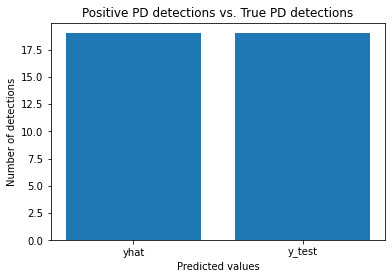

In [33]:
yhat_positives = tf.math.reduce_sum(yhat).numpy()
y_test_positives = tf.math.reduce_sum(yhat).numpy()

# Define labels and values
labels = ['yhat', 'y_test']
values = [yhat_positives, yhat_positives]

# Create bar chart
plt.bar(labels, values)

# Set chart title and axis labels
plt.title('Positive PD detections vs. True PD detections')
plt.xlabel('Predicted values')
plt.ylabel('Number of detections')

# Show plot
plt.show()

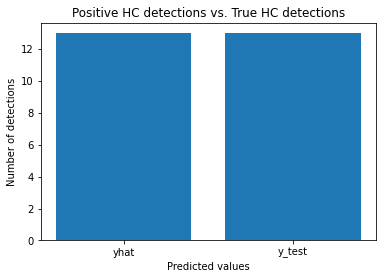

In [34]:
y_test_negatives = len(yhat) - num_positives
yhat_negatives = len(yhat) - num_positives

# Define labels and values
labels = ['yhat', 'y_test']
values = [yhat_negatives, y_test_negatives]

# Create bar chart
plt.bar(labels, values)

# Set chart title and axis labels
plt.title('Positive HC detections vs. True HC detections')
plt.xlabel('Predicted values')
plt.ylabel('Number of detections')

# Show plot
plt.show()

Classification report provides evaluation metrics such as precision, recall, f1-score, and accuracy for each class and overall performance of the model on a classification problem. In this case it provides it for the current batch.

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       1.00      1.00      1.00        19

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



The codes below evaluate the performance of the trained model on the test and train datasets and store the evaluation results in the variables result and train_result.

In [36]:
result=model.evaluate(test)
print(result)

9/9 [==============================] - 0s 20ms/step - loss: 0.0193 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000
[0.01931147277355194, 1.0, 1.0, 1.0]


In [37]:
train_result=model.evaluate(train)
print(train_result)

21/21 [==============================] - 0s 19ms/step - loss: 0.0266 - binary_accuracy: 0.9985 - precision: 0.9966 - recall: 1.0000
[0.026635294780135155, 0.9985119104385376, 0.9965635538101196, 1.0]


### Building functions for actual HC and PD audio files
#### Defining file paths

In [38]:
#Same code as the brginning, this time we are loading from testing/HC and testing/PD

for file in os.listdir(os.path.join('testing', 'HC')):
    if file.endswith('.wav'):
        file_path = os.path.join('testing', 'HC', file)
        audio = AudioSegment.from_wav(file_path)  #loads the WAV file
        audio = audio.set_sample_width(2) # 16-bit
        audio.export(file_path, format='wav')

            
for file in os.listdir(os.path.join('testing', 'PD')):
    if file.endswith('.wav'):
        file_path = os.path.join('testing', 'PD', file)
        
        audio = AudioSegment.from_wav(file_path)  #loads the WAV file
        audio = audio.set_sample_width(2) # 16-bit
        audio.export(file_path, format='wav')

In [39]:
wav

<tf.Tensor: shape=(3221021,), dtype=float32, numpy=
array([-9.1552734e-05,  9.1552734e-05, -6.1035156e-05, ...,
       -1.4648438e-03, -7.0190430e-04, -1.3427734e-03], dtype=float32)>

### Building a loading function

In [40]:
def load_wav_large(file_path):

    file_contents = tf.io.read_file(file_path)
    print("load encoded wav file..")
    wav, samplerate = tf.audio.decode_wav(file_contents, desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    samplerate = tf.cast(samplerate, dtype=tf.int64)
    print(f"Audio shape: {wav.shape}")
    print(f"Sample rate: {samplerate} Hz")
    print(f'dealing with {file_path}')
     
    return wav

In [41]:
wav = os.path.join('testing', 'PD', 'ID35_hc_0_0_0.wav')

In [42]:
wav=load_wav_large(file_path)
wav

load encoded wav file..
Audio shape: (6994025,)
Sample rate: 44100 Hz
dealing with testing\PD\ID36_pd_0_0_0.wav


<tf.Tensor: shape=(6994025,), dtype=float32, numpy=
array([0.        , 0.        , 0.        , ..., 0.00024414, 0.00045776,
       0.00021362], dtype=float32)>

This code creates a TensorFlow dataset of audio slices from a 1D array of audio waveforms where it generate a timeseries dataset where each example contains a sequence of 80000 audio samples with no overlap between the sequences. The sequence_stride parameter controls the distance between the start of each sequence. In this case, the batch size is set to 1, meaning that each training step will use a single example.

In [43]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=80000, sequence_stride=80000, batch_size=1)

In [44]:
samples, index = audio_slices.as_numpy_iterator().next()
samples.shape

(1, 80000)

In [45]:
len(audio_slices)

87

### Building a preprocessing function

In [46]:
def extract_mfcc(wav):
    return librosa.feature.mfcc(y=wav, sr=44100, n_mfcc=13)

In [47]:
@tf.function
def preprocess_audio1(sample, index): 
    # Load audio file
    samplerate=44100
    sample=sample[0]
    print(f'load data working..')
    
    #Create a zero-padding tensor of shape (80000 - length of sample)
    zero_padding = tf.zeros([80000 - tf.shape(sample)[0]], dtype=tf.float32)
    
    # Concatenate the zero-padding tensor with the original sample tensor
    wav = tf.concat([zero_padding, sample],0)
        
    wav = tf.convert_to_tensor(wav)
    print(f'converted into tensor worked: {wav}')

    # Extract MFCC features
    mfccs = tf.numpy_function(func=extract_mfcc, inp=[wav], Tout=tf.float32)

    # Pad MFCCs to maximum length
    mfccs = abs(mfccs)
    print(f'ABS..')

    mfccs = tf.expand_dims(mfccs, axis=-1)
    print(f'expand dims..')

    # Return MFCCs and label as tensor objects
    return mfccs, label

Now we will create a time-series dataset from an audio waveform wav, with a fixed sequence length and stride of 80000 samples, and a batch size of 1. Then, apply the preprocess_audio1 function to each element of the dataset using the map method.

In [48]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=80000, sequence_stride=80000, batch_size=1)
audio_slices = audio_slices.map(preprocess_audio1)
audio_slices = audio_slices.batch(64)

load data working..
converted into tensor worked: Tensor("concat:0", shape=(None,), dtype=float32)
ABS..
expand dims..


In [49]:
#Prediction
yhat = model.predict(audio_slices)
yhat


array([[8.2427669e-01],
       [2.9684603e-01],
       [9.4053048e-01],
       [8.5010254e-01],
       [9.3917680e-01],
       [8.1793261e-01],
       [9.9698067e-01],
       [9.4567466e-01],
       [9.9946845e-01],
       [9.9940532e-01],
       [8.2164621e-01],
       [8.1332773e-01],
       [7.3507565e-01],
       [7.3737729e-01],
       [1.8196326e-01],
       [8.5828233e-01],
       [4.3762207e-01],
       [7.4317968e-01],
       [5.7028526e-01],
       [9.1333318e-01],
       [6.0718310e-01],
       [8.9708257e-01],
       [2.8159067e-01],
       [6.6171736e-02],
       [7.4370837e-01],
       [4.8669237e-01],
       [9.9353075e-01],
       [3.1078756e-03],
       [8.1734961e-01],
       [6.8153816e-01],
       [9.3083024e-01],
       [7.4625045e-02],
       [9.9979144e-01],
       [6.8841749e-01],
       [9.8763800e-01],
       [1.9527316e-02],
       [6.5717053e-01],
       [8.8649660e-02],
       [9.1857660e-01],
       [8.2327616e-01],
       [6.4713925e-01],
       [9.109926

In [50]:
yhat = [1 if prediction > 0.7 else 0 for prediction in yhat]
yhat

[1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1]

### Slicing and predicting

This code will loop through all the '.wav' files in the 'testing/PD' directory which holds original audios, loads each file and slices it into 1-second intervals, preprocesses the audio data, and then feeds it into the trained model to make a prediction for each slice. The predictions are stored in a dictionary with the filename as the key.

In [51]:
results = {} #dict to hold results
for file in os.listdir(os.path.join('testing', 'PD')):
    FILEPATH = os.path.join('testing','PD', file)
    if file.endswith('.wav'):
        
        # Load the WAV file and convert it to a timeseries dataset
        wav = load_wav_large(FILEPATH)
        audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=80000, sequence_stride=80000, batch_size=1)
        # Preprocess the timeseries dataset and batch it
        audio_slices = audio_slices.map(preprocess_audio1)
        audio_slices = audio_slices.batch(64)
        
    # Using the trained model to make predictions on the preprocessed timeseries dataset
    yhat = model.predict(audio_slices)
    
    # Store the predictions in the results dictionary
    results[file] = yhat

load encoded wav file..
Audio shape: (6664159,)
Sample rate: 44100 Hz
dealing with testing\PD\ID00_hc_0_0_0.wav
load encoded wav file..
Audio shape: (7237033,)
Sample rate: 44100 Hz
dealing with testing\PD\ID01_pd_0_0_0.wav
load encoded wav file..
Audio shape: (6154390,)
Sample rate: 44100 Hz
dealing with testing\PD\ID03_pd_0_0_0.wav
load encoded wav file..
Audio shape: (4891877,)
Sample rate: 44100 Hz
dealing with testing\PD\ID05_hc_0_0_0.wav
load encoded wav file..
Audio shape: (7890377,)
Sample rate: 44100 Hz
dealing with testing\PD\ID06_pd_3_1_1.wav
load encoded wav file..
Audio shape: (6512057,)
Sample rate: 44100 Hz
dealing with testing\PD\ID07_pd_2_0_0.wav
load encoded wav file..
Audio shape: (6443220,)
Sample rate: 44100 Hz
dealing with testing\PD\ID08_hc_0_0_0.wav
load encoded wav file..
Audio shape: (5533491,)
Sample rate: 44100 Hz
dealing with testing\PD\ID09_hc_0_0_0.wav
load encoded wav file..
Audio shape: (6031660,)
Sample rate: 44100 Hz
dealing with testing\PD\ID10_hc_0_

In [52]:
results

{'.ipynb_checkpoints': array([[8.2427669e-01],
        [2.9684603e-01],
        [9.4053048e-01],
        [8.5010254e-01],
        [9.3917680e-01],
        [8.1793261e-01],
        [9.9698067e-01],
        [9.4567466e-01],
        [9.9946845e-01],
        [9.9940532e-01],
        [8.2164621e-01],
        [8.1332773e-01],
        [7.3507565e-01],
        [7.3737729e-01],
        [1.8196326e-01],
        [8.5828233e-01],
        [4.3762207e-01],
        [7.4317968e-01],
        [5.7028526e-01],
        [9.1333318e-01],
        [6.0718310e-01],
        [8.9708257e-01],
        [2.8159067e-01],
        [6.6171736e-02],
        [7.4370837e-01],
        [4.8669237e-01],
        [9.9353075e-01],
        [3.1078756e-03],
        [8.1734961e-01],
        [6.8153816e-01],
        [9.3083024e-01],
        [7.4625045e-02],
        [9.9979144e-01],
        [6.8841749e-01],
        [9.8763800e-01],
        [1.9527316e-02],
        [6.5717053e-01],
        [8.8649660e-02],
        [9.1857660e-01],
   

A dictionary is created of predicted classes for each file in the 'results' dictionary, based on a threshold value

In [53]:
class_preds = {}
for file, logits in results.items():
    class_preds[file] = [1 if prediction > 0.9 else 0 for prediction in logits]
class_preds

{'.ipynb_checkpoints': [0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0],
 'ID00_hc_0_0_0.wav': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0],
 'ID01_pd_0_0_0.wav': [0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,

This code is performing post-processing on the classification predictions made on audio files.

In [54]:
from itertools import groupby
postprocessed = {}
for file, scores in class_preds.items():
    postprocessed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()
postprocessed


{'.ipynb_checkpoints': 17,
 'ID00_hc_0_0_0.wav': 17,
 'ID01_pd_0_0_0.wav': 23,
 'ID03_pd_0_0_0.wav': 18,
 'ID05_hc_0_0_0.wav': 14,
 'ID06_pd_3_1_1.wav': 18,
 'ID07_pd_2_0_0.wav': 19,
 'ID08_hc_0_0_0.wav': 10,
 'ID09_hc_0_0_0.wav': 16,
 'ID10_hc_0_0_0.wav': 17,
 'ID11_hc_0_0_0.wav': 13,
 'ID12_hc_0_0_0.wav': 18,
 'ID14_pd_0_0_0.wav': 15,
 'ID15_pd_0_0_0.wav': 16,
 'ID16_pd_2_0_0.wav': 18,
 'ID19_hc_0_0_0.wav': 20,
 'ID20_pd_3_0_1.wav': 16,
 'ID21_hc_0_0_0.wav': 8,
 'ID22_hc_0_0_0.wav': 19,
 'ID23_pd_0_0_0.wav': 25,
 'ID24_hc_2_0_0.wav': 12,
 'ID25_hc_0_0_0.wav': 18,
 'ID26_hc_0_0_0.wav': 10,
 'ID28_pd_0_0_0.wav': 19,
 'ID29_hc_3_1_2.wav': 17,
 'ID30_hc_2_1_1.wav': 15,
 'ID31_pd_0_1_1.wav': 25,
 'ID35_hc_0_0_0.wav': 11,
 'ID36_pd_0_0_0.wav': 17}

In [55]:
score_above_20 = {k: v for k, v in postprocessed.items() if v >= 20}
score_below_20 = {k: v for k, v in postprocessed.items() if v < 20}


In [56]:
score_above_20


{'ID01_pd_0_0_0.wav': 23,
 'ID19_hc_0_0_0.wav': 20,
 'ID23_pd_0_0_0.wav': 25,
 'ID31_pd_0_1_1.wav': 25}

In [57]:
score_below_20

{'.ipynb_checkpoints': 17,
 'ID00_hc_0_0_0.wav': 17,
 'ID03_pd_0_0_0.wav': 18,
 'ID05_hc_0_0_0.wav': 14,
 'ID06_pd_3_1_1.wav': 18,
 'ID07_pd_2_0_0.wav': 19,
 'ID08_hc_0_0_0.wav': 10,
 'ID09_hc_0_0_0.wav': 16,
 'ID10_hc_0_0_0.wav': 17,
 'ID11_hc_0_0_0.wav': 13,
 'ID12_hc_0_0_0.wav': 18,
 'ID14_pd_0_0_0.wav': 15,
 'ID15_pd_0_0_0.wav': 16,
 'ID16_pd_2_0_0.wav': 18,
 'ID20_pd_3_0_1.wav': 16,
 'ID21_hc_0_0_0.wav': 8,
 'ID22_hc_0_0_0.wav': 19,
 'ID24_hc_2_0_0.wav': 12,
 'ID25_hc_0_0_0.wav': 18,
 'ID26_hc_0_0_0.wav': 10,
 'ID28_pd_0_0_0.wav': 19,
 'ID29_hc_3_1_2.wav': 17,
 'ID30_hc_2_1_1.wav': 15,
 'ID35_hc_0_0_0.wav': 11,
 'ID36_pd_0_0_0.wav': 17}

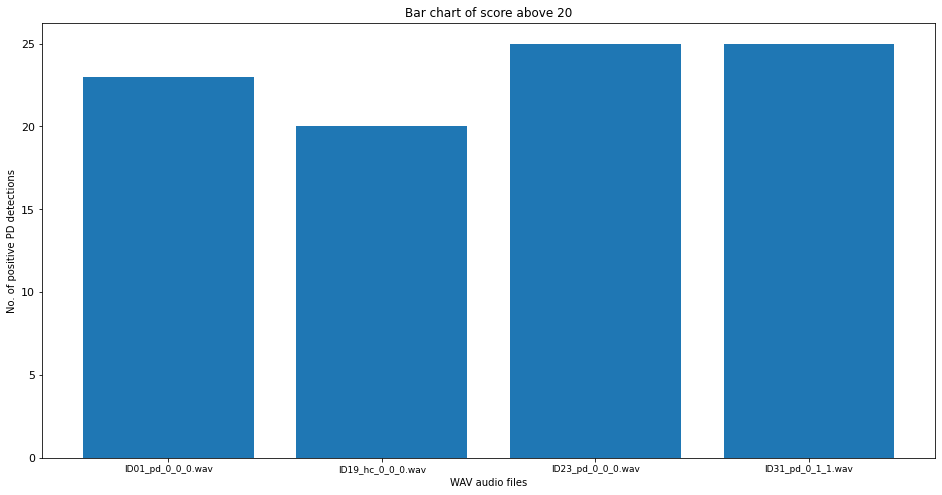

In [58]:
import matplotlib.pyplot as plt

# Set the size of the figure
plt.figure(figsize=(16, 8))

score_above_20 = {k: v for k, v in postprocessed.items() if v >= 20}

# Extracting keys and values
keys = score_above_20.keys()
values = score_above_20.values()

# Create the bar chart
plt.bar(score_above_20.keys(), score_above_20.values())

# Set the font size of the labels
plt.xticks(fontsize=9)
plt.yticks(fontsize=11)

# Show the plot
plt.xlabel('WAV audio files')
plt.ylabel('No. of positive PD detections')
plt.title('Bar chart of score above 20')
plt.show()


### These cells show a dictionary of audio files and their scores indicating whether they are classified as "pd" or "hc". The files with scores above 20 are classified as "pd" and those with scores below 20 are classified as "hc" yet, these do not accurately determine the classification based on the assumption that the threshold value used to group the audio files is 20, and a higher score indicates that the audio is being classified as "pd".